# Training linear models
In this notebook, we will first start by looking at the Linear Regression model. The model will be trained in 2 ways:
1. Using a direct 'closed-form' equation - that directly computes the model parameters best fit to the training set.
2. Using an iterative optimization approach called Gradient Descent(GD) - that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging on the same set of parameters as the first method.

Then we will look at Polynomial Regression, a model that can fit non-linear datasets.
<br><br>
Then we will look at several Regularization techniques that can reduce the risk of overfitting the training sets.
<br><br>
Finally, we will look at 2 more models : Logistic Regression and Softmax Regression.

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear Regression

A linear model makes prediction by calculating the weighted sum of the input featuers, plus a constanst called the <i>bias term</i> (also called the intercept term).<br><br>
The equation is as shown below:

## $$ \hat y = \theta_0 + \theta_1x_1 + \theta_2x_2 + .... + \theta_nx_n $$

<br> where,<br>
  * **ŷ** is the predicted value.
  * **n** is the number of features.
  * **$x_{i}$** is the i$^{th}$ feature value.
  * **&#952;$_{j}$** is the j$^{th}$ the model parameter (including the <i>bias term &#952;$_{0}$</i> and the feature weights &#952;$_{1}$, &#952;$_{2}$, .... &#952;$_{n}$.)

The vectorized form:
## $$ \hat y = \theta^T . x $$

<b>Note: </b>In ML, vectors are often represented as column vectors, which are 2D arrays with a single column. &#952;$^{T}$ is the transpose of &#952; and **&#952;$^{T}$x** is the matrix multiplication of &#952;$^{T}$ and x, which is ofcourse equal to &#952;$_{0}$x$_{0}$ + &#952;$_{1}$x$_{1}$ + &#952;$_{2}$x$_{2}$ + .....  + &#952;$_{n}$x$_{n}$ 

The most common performance measure of regression model is the Root Mean Square Error (RMSE).

The motive in Linear Regression is to minimize the cost function. Given our simple linear equation *𝑦=𝑚𝑥+𝑏*, we can calculate MSE as:

## $$MSE(X, h_\theta)= \frac{1}{m} \sum_{i=1}^m (\theta^Tx^{(i)} - y^{(i)})^2 $$

### The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a *closed-form solution*, in other words, a math equation that gives the result directly. This is called the *Normal Equation*.

## $$ \hat \theta = (X^T.X)^{-1}.X^T.y  $$

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)

#y = mx + c
y = 4 + 3 * X + np.random.randn(100, 1) # here 𝜃0 = 4 and 𝜃1 = 3 

Saving figure generated_data_plot


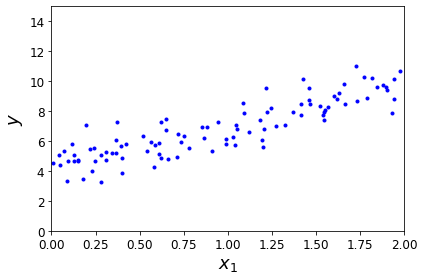

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance. [y = mx1 + cx0]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

We expect $\theta_{0}$ = 4 and $\theta_{1}$ = 3, but this is close enough.

In [5]:
X_new = np.array([[0],[2]])

#print(X_new)
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance.
#print(X_new_b)

y_predict = X_new_b.dot(theta_best) 

y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure linear_model_predictions_plot


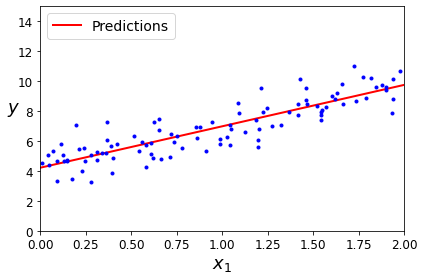

In [6]:
plt.plot(X_new, y_predict, 'r-', linewidth=2, label="Predictions")
plt.plot(X, y , 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
save_fig("linear_model_predictions_plot")
plt.show()

Performing Linear Regression using Scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

### Gradient Descent
The general idea of gradient descent is to tweak parameters iteratively in order to minimize the cost function.<br>
<br>
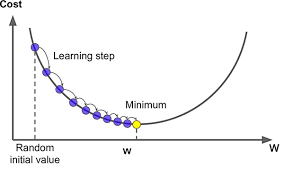
<br>
#### Batch Gradient Descent
We need to calculate how much the cost function will change if we change $\theta_j$ a little bit. This is called a *partial derivative.*<br>

### $$ \frac{\partial} {\partial\theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^m (\theta^Tx^{(i)} - y^{(i)})x_j^{(i)} $$

Instead of computing these partial derivatives individually, we can use the below eq$^n$ to compute them all in one go. The gradient vector, noted $\nabla_{\theta}$ MSE($\theta$), contains all the partial deivatives of the cost function (one for each model parameter).
<br><br>
$$ \nabla_{\theta} MSE(\theta) = \begin{bmatrix} \frac{\partial} {\partial\theta_0} MSE(\theta) \\ \frac{\partial} {\partial\theta_1} MSE(\theta) \\ \vdots \\ \frac{\partial} {\partial\theta_n} MSE(\theta) \end{bmatrix} = \frac{2}{m} X^T(X\theta - y) $$


This formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called **Batch Gradient Descent**: It uses the whole batch of training data at every step. 
<br>As a result it is terribly slow on very large training sets. However, Gradient Descent scales well with the number of features and is much faster than using the Normal equation or SVD composition.

##### Gradient Descent step
Once you the gradient vectorm which points uphill, jus go in the opposite direction to go downhill. This means subtracting $ \nabla_{\theta} MSE(\theta)$ form $\theta$ .<br><br>
The equation is:
### $$\theta^{(next step)} = \theta - \eta\ \nabla_{\theta} MSE(\theta)$$
<br>
where,
$\eta$ is the learning rate (the size of the downhill step)


In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [10]:
theta

array([[4.21509616],
       [2.77011339]])

That's exactly what the Normal equation found!

In [11]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [12]:
theta_path_bgd = [] # used later for bgd vs sgd vs mgd comparison 

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'r--' if iteration == 0 else 'b-'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


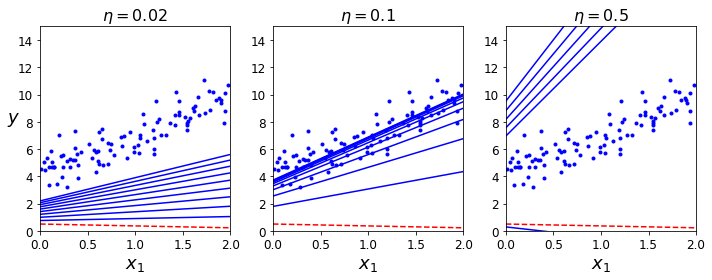

In [13]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

* On the left, the learning rate is too low: the algorithm will reach the solution, but it will take a long time.
* In the middle, the learning rate is good: in just few iterations, it has already converged to the solution.
* On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution.

To find a good learning rate, use a grid search.

#### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.<br><br>
*Stochastic Gradient Descent* picks a random instance in the training set at every step and computes the gradients only on that single instance. It is much faster as it has little data to manipulate.<br>
On the other hand, due to its stochastic (i.e random) nature, the algorithm is much less regular than the Batch Gradient Descent : instead of gradually decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average.<br><br>
Due to this randomness, it escapes from local minima, but bad because it can never settle at the minimum. One solution is to gradually reduce the learning rate.

In [14]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50

t0, t1 = 5, 50

the function that determines the learning rate at each iterations is called learning schedule.

In [15]:
def learning_schedule(t):
    return t0 / (t + t1)

Saving figure sgd_plot


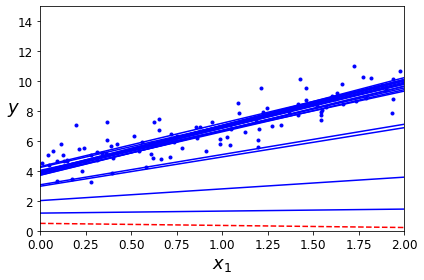

In [16]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown
    
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [17]:
# Performing Lenear Regression using Stochastic Gradient Descent

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

#### Mini-Batch Gradient Descent

Mini-Batch Gradient Descent computes the gradients on small batches of training set, instead of computing the gradients on the entire training set (as in Batch GD) or based on just one instance (as in Stochastic GD).<br>
The main advantage over the other two is that you get a performance boost from hardware optimization of matrix operations especially when using GPUs.

In [18]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)

theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [19]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [20]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


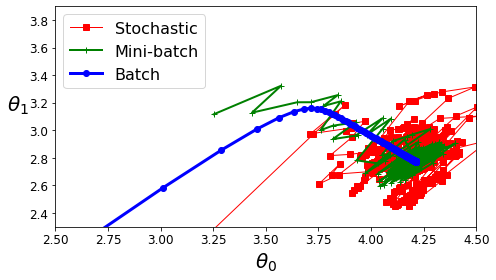

In [21]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

## Polynomial regression

You can fit linear model to non-linear data. A simple way to do this is 
1. to add powers of each feature as new features, 
2. then train a linear model on this extended set of features. <br><br>
This technique is called *Polynomial Regression*. A quadratic e$q^n$ is of form y = a$x^2$ + bx + c

In [22]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m,1) - 3
# y = a𝑥2  + bx + c
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


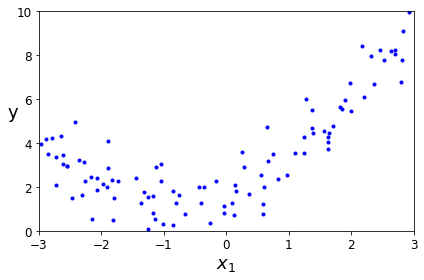

In [23]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.axis([-3,3,0,10])
save_fig("quadratic_data_plot")
plt.show()

1. adding second degree polynomial of each feature in the training set as a new feature (in this case, there is just one.)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

In [25]:
X[0]

array([-0.75275929])

In [26]:
X_poly[0]

array([-0.75275929,  0.56664654])

X_poly now contains the original feature of X plus the square of this feature.

2. Fitting a Linear Regression

In [27]:
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Not bad:<br>
The original function was $0.5x_1^2 + 1.0x_1 + 2.0$ and <br>
the model estimates $ \hat y = 0.56x_1^2 + 0.93x_1 + 1.78 $ + Gaussian noise  .

Saving figure quadratic_predictions_plot


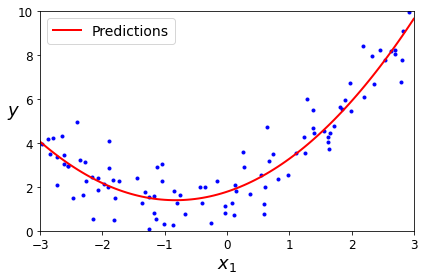

In [28]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

## Learning Curves

Saving figure high_degree_polynomials_plot


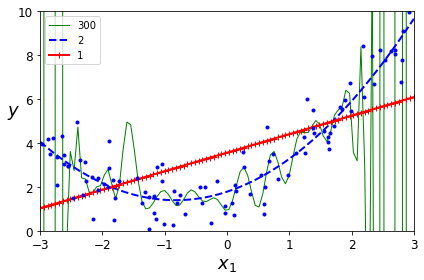

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in ("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
    ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()


The high-degree model is severely overfitting while the linear model is underfitting it.
In general we wouldn't know what function generated the data, so how to decide how complex the model will be?
1. One way is to see if model performs well on training data but generalizes poorly on cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it's underfitting.
2. Another way is to look at the *learning curves*:

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

Saving figure underfitting_learning_curves_plot


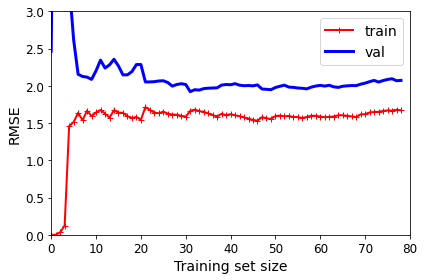

In [31]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

These learning curves are typical of a model that's underfitting.<br><br>
When there are one or two instances in the training set, the model can fit perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training set perfectly, both because data is noisy and it is not linear at all.<br><br>
On the validation data, the model is trained on very few instances, hence incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down.

* *Now, let's look at the learning curves of a 10th-degree polynomial model on the same data.*

Saving figure learning_curves_plot


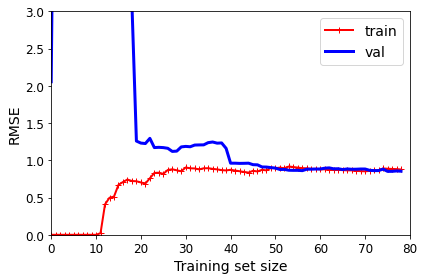

In [32]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])                 
save_fig("learning_curves_plot")   
plt.show()                             

Observations:
* The error on the training data is much than lower with the Linear Regression model.
* There is a gap between the curves. This means the model performes significantly better on the training data than on the validation data (implies overfitting)

**Note** : One way to improve overfitting model is to feed more training data until validation error reaches the training error.

## Regularized Linear Models

A good way to reduce overfitting is to regularize the model (i.e constrain it). A simple way to regularize a polynomial model is to reduce the no. of polynomial degrees.<br>
For a linear model, regularization is done by constraining the weights of the model.<br>
We will now look at 
* Ridge Regression
* Lasso Regression and 
* Elastic Net

### Ridge Regression

A regularization term equal to $\alpha \sum_{i=1}^n \theta_i^2  $ is added to the cost function. This keeps the model weights as small as possible.<br><br>

**Note**: The regularization term should be added only during the training.

*Ridge Regression cost function:*
###   $ j(\theta) = MSE(\theta) $ +  <font color='red'>  $ \alpha \frac {1}{2} \sum_{i=1}^n \theta_i^2 $ </font>

* If $\alpha$ = 0, then Ridge Regression is just Linear Regression.  
* If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.
<br><br>

If we define *w* as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularized term is equal to $ \frac{1}{2}(||w||_2)^2$, where ||w||$_2$ represents the **$\ell_2$ norm** of the weight vector.

In [33]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

For polynomial regression, 
* data is first expanded using PolynomialFeatures(degree=10),
* then it is scaled using a StandardScaler,
* and finally the Ridge model are applied to the resulting features.

NameError: name 'Ridge' is not defined

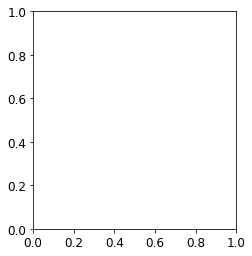

In [34]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha,style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_reg', PolynomialFeatures(degree=10, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', model)
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        line_width = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=line_width, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    
plt.figure(figsize=(8,4))

# Plain ridge models leading to linear predictions
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

# polynomial regression with ridge regression
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

With Linear Regression, we can perform Ridge Regression either by computing the closed-form equation or by performing Gradient Descent.

##### Using closed-form solution

Ridge Regression closed-form solution:<br>
$ \hat \theta = (X^TX $ + <font color="red"> $\alpha$ A </font>)$^{-1} X^T y $
<br>where, A is (n+1) x (n+1) identity matrix.

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

In [ ]:
ridge_reg = Ridge(alpha=1, solver='saga', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

##### Using Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

The penalty hyperparameter sets the type of regularization term to use. Specifying '$\ell$2' indicates that you want SGD to add a regularization term to the cost function which is equal to half the square of $\ell$2 norm of the weight vector.

### Lasso Regression

It uses *$\ell$1* norm of the weight vector instead of half the square of the *$\ell$2* norm.<br><br>
Lasso Regression cost function:<br>
J($\theta$) = MSE($\theta$) + <font color='red'>  $ \alpha \sum_{i=1}^n |\theta_i| $ </font>


In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))

plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

### Elastic Net

Elastic Net is the middle ground between Ridge and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso and you can control the miz ratio r. When r = 0, it is equivalent to Ridge, when r = 1, it is equivalent to Lasso.<br><br>
Elastic Net cost function:<br>
$J(\theta) = MSE(\theta)$ + <font color='red'>$ + r\alpha\sum_{i=1}^n|\theta_i| + \frac{1-r}{2} \alpha\sum_{i=1}^n\theta_i^2 $</font> 

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

#### When to use regularization ?
* Generally you should avoid plain Linear Regression and it is always preferable to have at least a little bit of regularization.
* Ridge, is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net (because they tend to reduce the useless features' weights down to zero).
* In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater thatn the number of training instances or when several features are strongly correlated.

## Early Stopping

Another way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. 

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [ ]:
from copy import deepcopy

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off. due to warm_start = True
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

minimum_val_error, best_epoch, best_model

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [ ]:
best_epoch, best_model


## Logistic Regression
Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class( eg: email is spam). If the estimated probability is greater than 50%, then the model estimates that the instance belongs to that class. <br><br>
Logistic Regression model estimated probability (vectorized form):
$$ \hat p = h_\theta(x) = \sigma(x^T\theta) $$
where,<br>
$\sigma$ is the *sigmoid function*, that outputs a number between 0 and 1.<br><br>
*Logistic function:* $\sigma(t) = \frac{1}{1 + exp(-t)}$

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9,3))

plt.plot( [-10, 10], [0., 0.], 'k-')
plt.plot( [-10, 10], [0.5, 0.5], 'k:')
plt.plot( [-10, 10], [1., 1.], 'k:')
plt.plot( [0, 0], [-1,1], 'k-')

plt.plot(t, sig, 'b-', linewidth=2, label=r'$\sigma(t) = \frac{1}{1 + e^{-t}}$')
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")

plt.show()

#### Training and Cost function
Logistic Regression cost function (log loss):
$$ J(\theta) = \frac{-1}{m} \sum_{i=1}^{m} [y^{(i)}log(\hat p ^{(i)}) + (1 - y^{(i)}) log(1 - \hat p^{(i)}) ] $$

To compute the value of $\theta$, there is no known Normal Equation. But, since this cost function is convex, gradient descent is used to find the global minimum.<br>

The partial derivatives of the cost function with regard to the $j^{th}$ model parameter $\theta_j$, are given by equation:
$$  \frac{\partial} {\partial\theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m (\sigma(\theta^Tx^{(i)}) - y^{(i)})x_j^{(i)} $$

#### Decision Boundaries
Let's use iris dataset. This dataset contains 150 the sepal and petal length and width of 150 iris flowers of three different species: *Iris setosa, Iris vesicolor and Iris virginica*. Let's try to build a classifier to detect the *Iris virginica* type based only on the petal width feature.

In [36]:
from sklearn import datasets
iris = datasets.load_iris()

list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [49]:
X = iris['data'][:,3:] # gives petal width
y = (iris['target'] == 2).astype(np.int)

In [52]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Saving figure logistic_regression_plot


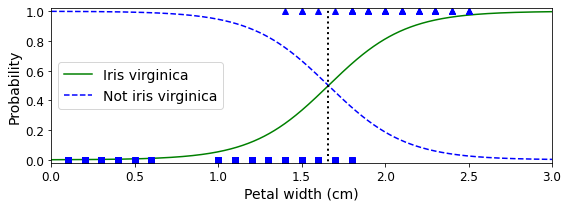

In [95]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not iris virginica')
plt.legend(loc="center left", fontsize=14)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "b^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [106]:
decision_boundary

array([1.66066066])

In [107]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

Saving figure logistic_regression_contour_plot


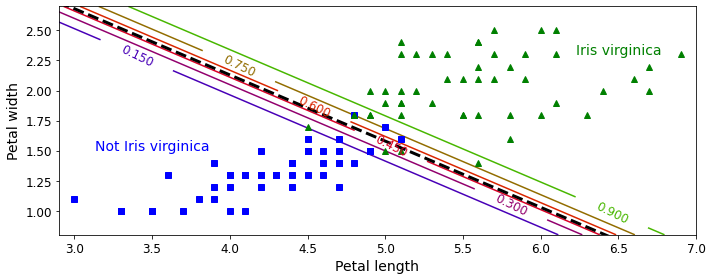

In [116]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

## Softmax Regression
Softmax Regression is *Multinomial Logistic Regression*. The logistic regression model can be generalized to support multiple classes.<br>
Let's use Softmax Regression to classify the iris flowers into all three classes.<br><br>
Scikit-learn's LogisticRegression uses one-versus-the-rest by default when you train it on more than two classses, but you can set the *multi_class* hyperparameter to 'multinomial' to switch it to Softmax Regression.You must also specify a solver( i.e `lbfgs`) that supports the Softmax Regression.

In [144]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

softmax_reg.predict([[5,2]])

array([2])

In [145]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Saving figure softmax_regression_contour_plot


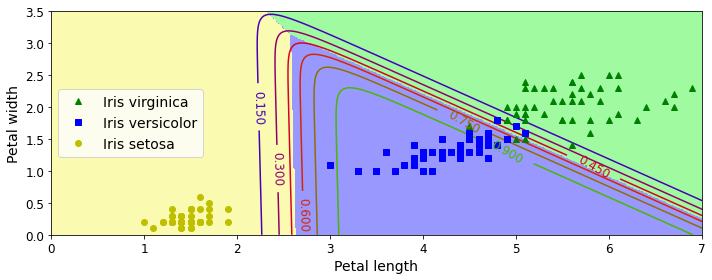

In [146]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap) # creates the color regions
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg) 
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()